# Laboratorio 01

- Mario Guerra
- Javier Alvarado

El conjunto de datos fue recolectado en el “Hospital Universitario de Caracas” en Venezuela. Comprende
información demográfica, hábitos y registros históricos de 858 pacientes. A continuación, la importación del dataset a nuestro ambiente de Python.

In [1]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
cervical_cancer_risk_factors = fetch_ucirepo(id=383) 
  
# data (as pandas dataframes) 
X = cervical_cancer_risk_factors.data.features 
y = cervical_cancer_risk_factors.data.targets 
  
# metadata 
#print(cervical_cancer_risk_factors.metadata) 
  
# variable information 
print(cervical_cancer_risk_factors.variables) 

                                  name     role        type demographic  \
0                                  Age  Feature     Integer         Age   
1            Number of sexual partners  Feature  Continuous       Other   
2             First sexual intercourse  Feature  Continuous        None   
3                   Num of pregnancies  Feature  Continuous        None   
4                               Smokes  Feature  Continuous        None   
5                       Smokes (years)  Feature  Continuous        None   
6                  Smokes (packs/year)  Feature  Continuous        None   
7              Hormonal Contraceptives  Feature  Continuous        None   
8      Hormonal Contraceptives (years)  Feature  Continuous        None   
9                                  IUD  Feature  Continuous        None   
10                         IUD (years)  Feature  Continuous        None   
11                                STDs  Feature  Continuous        None   
12                       

# Informe automatizado

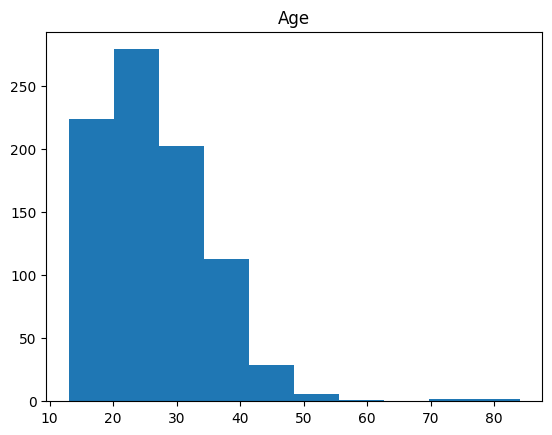

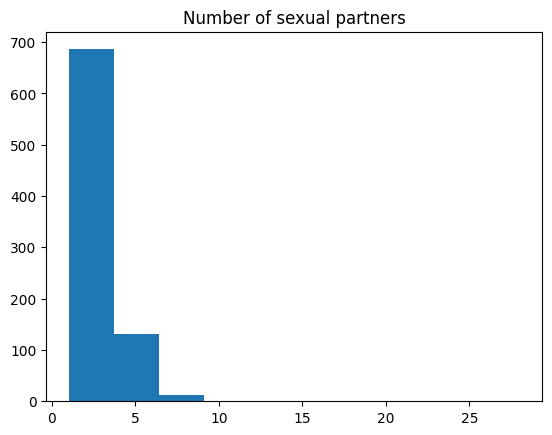

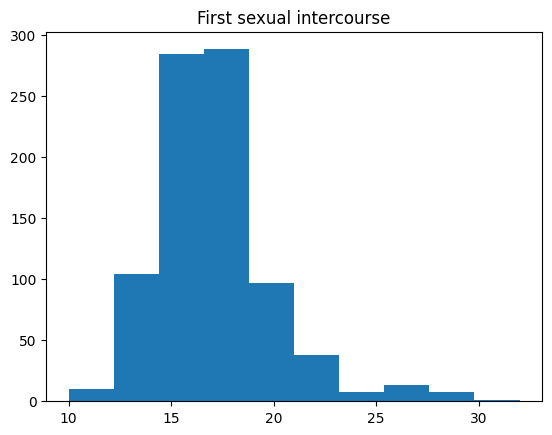

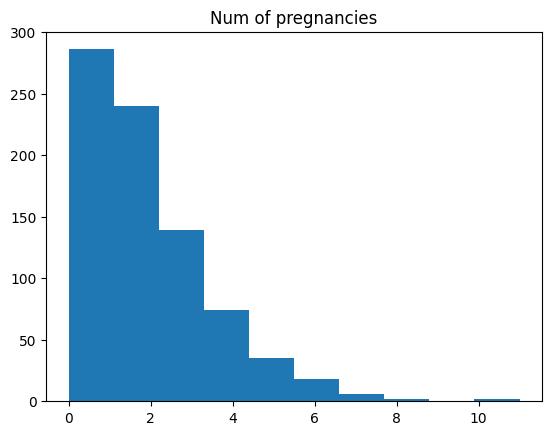

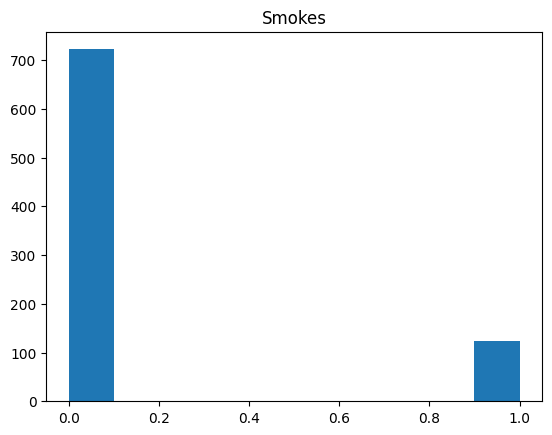

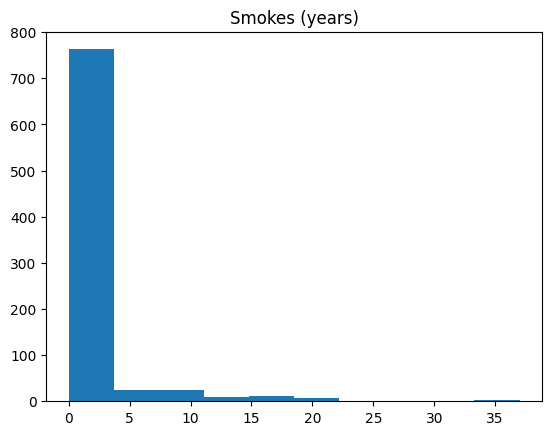

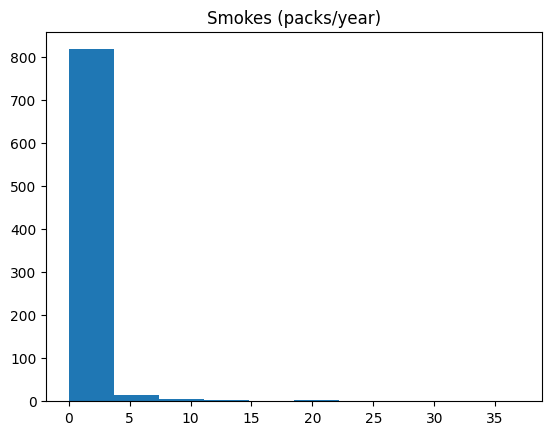

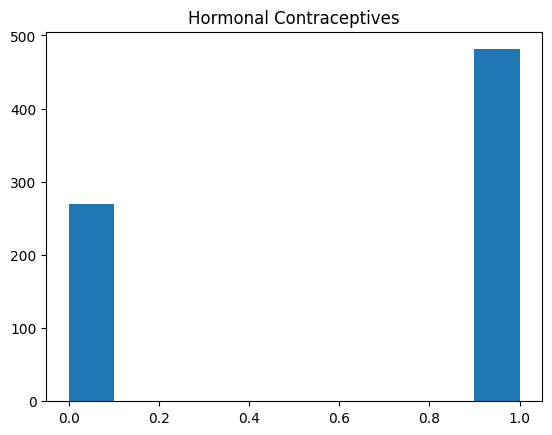

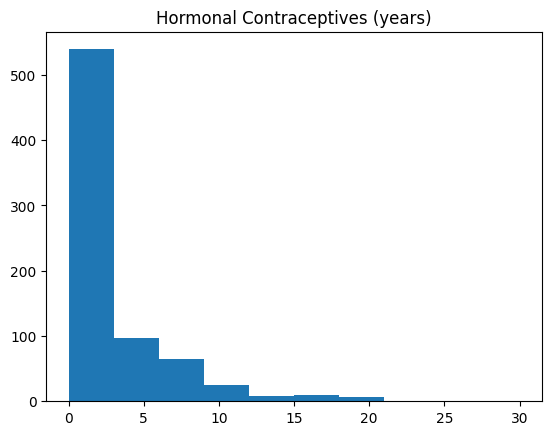

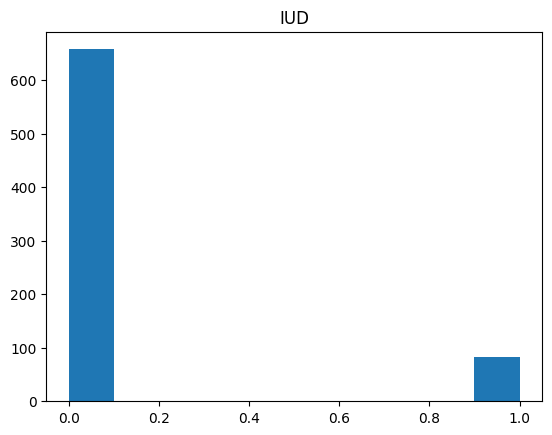

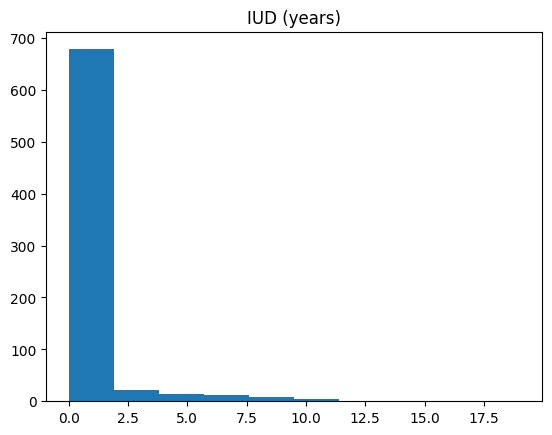

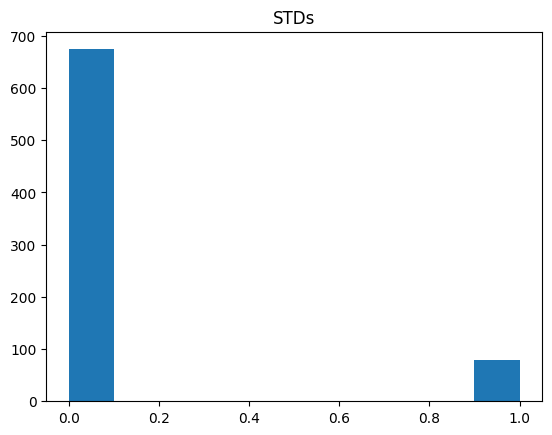

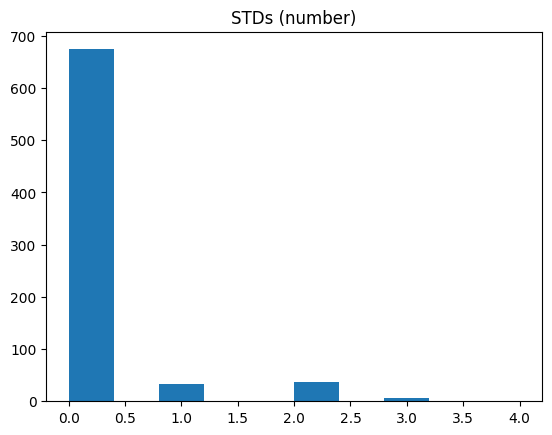

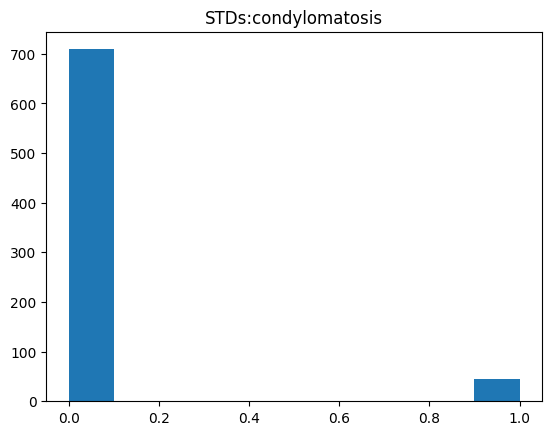

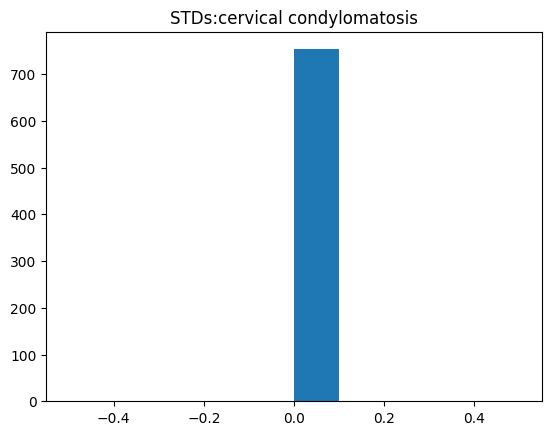

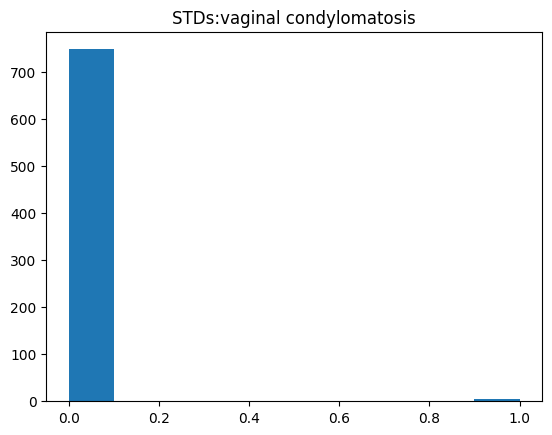

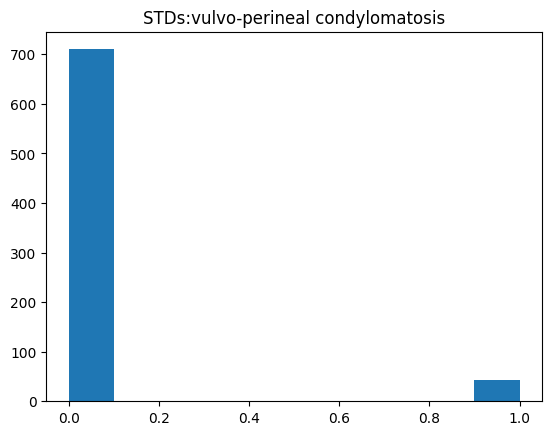

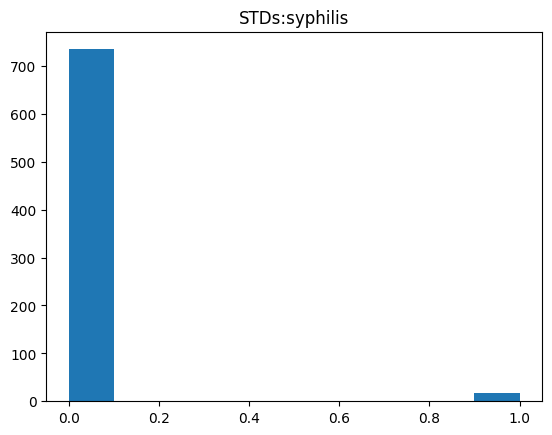

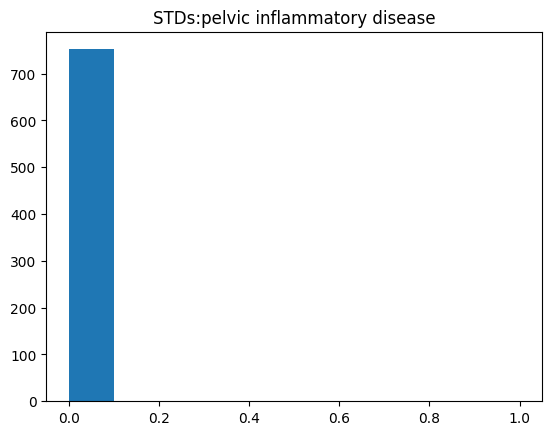

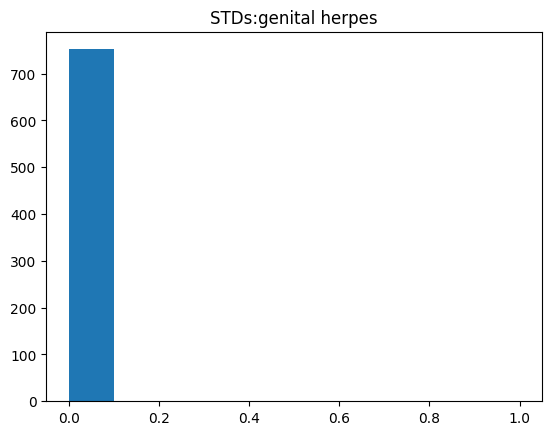

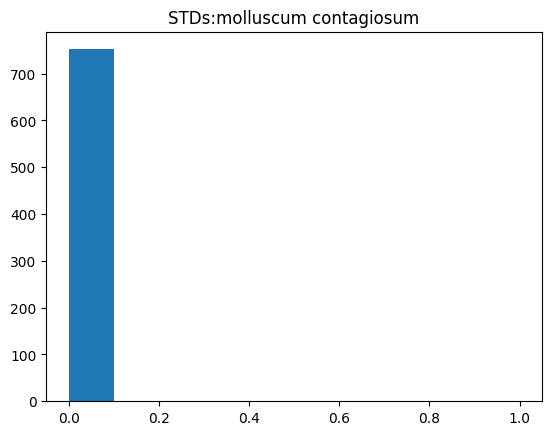

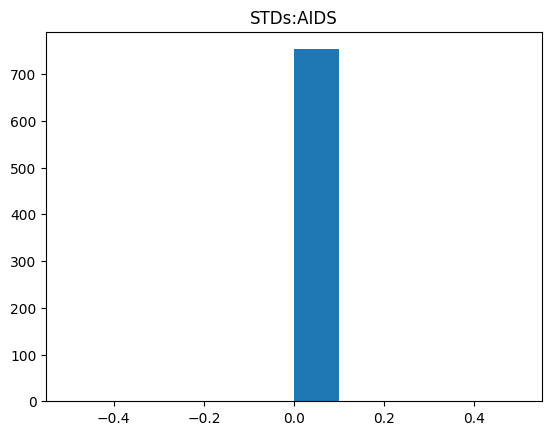

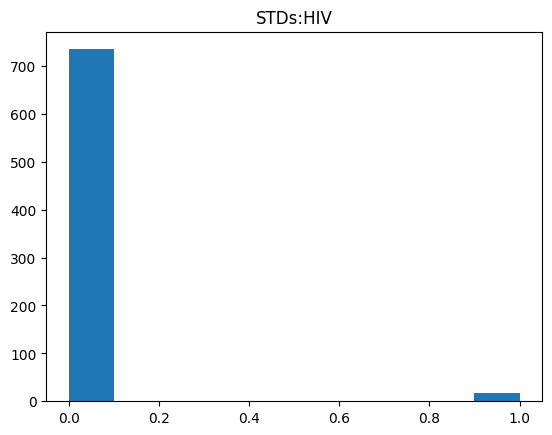

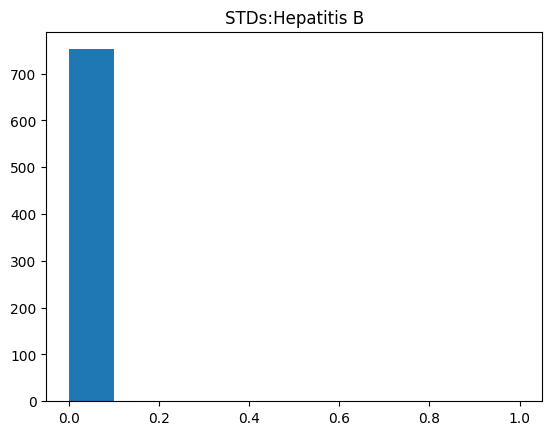

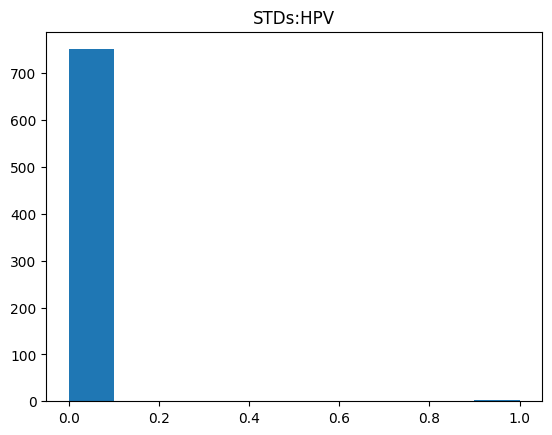

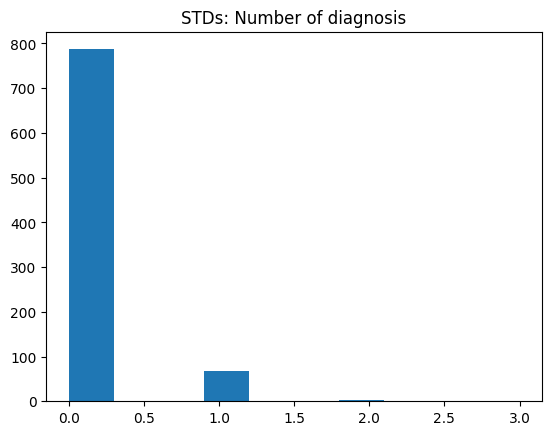

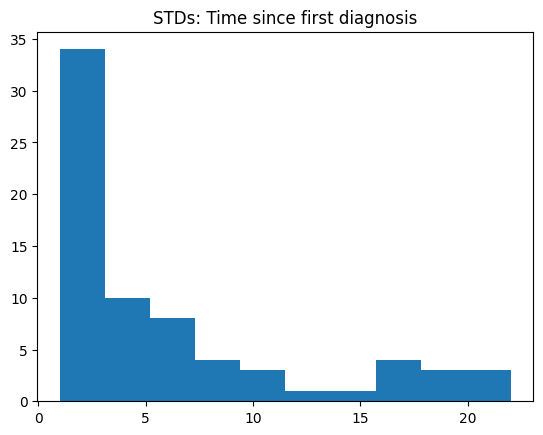

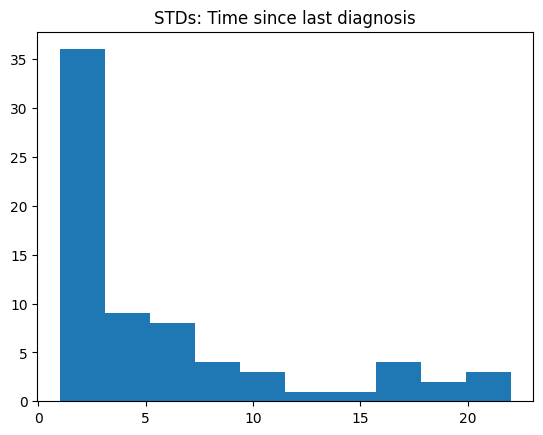

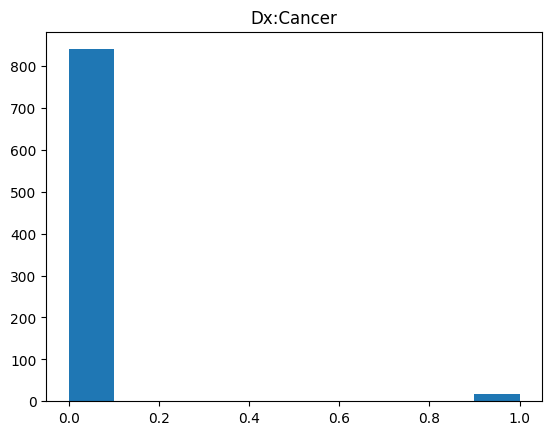

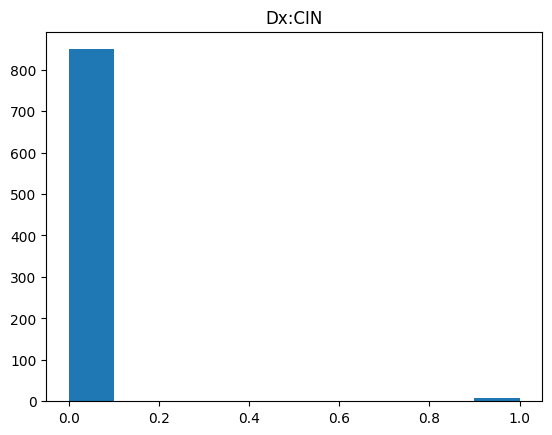

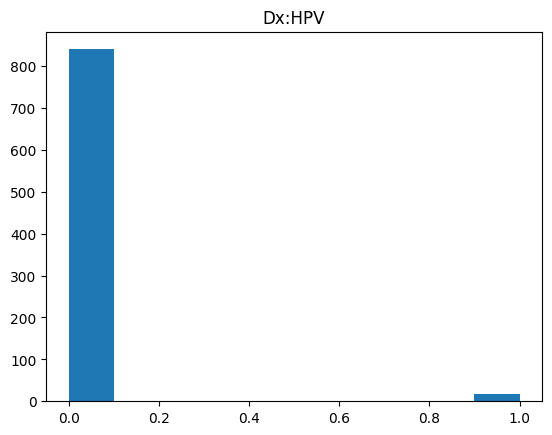

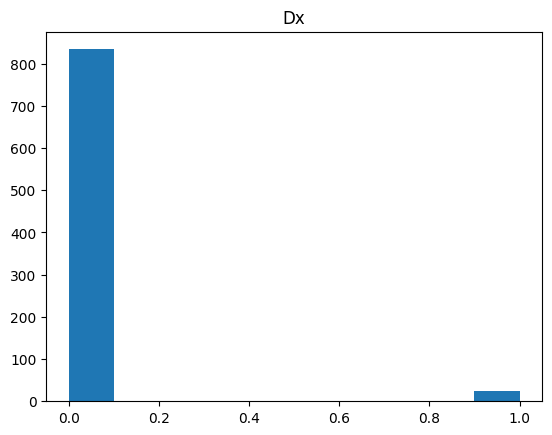

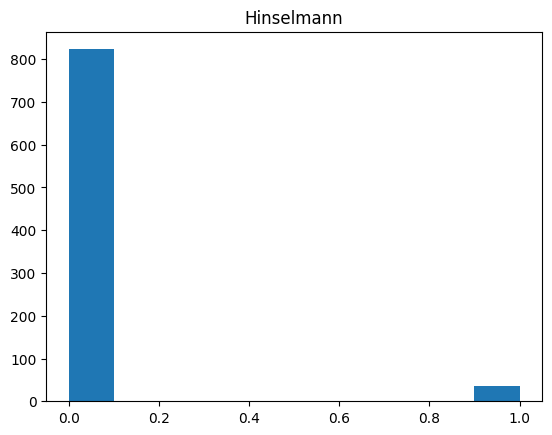

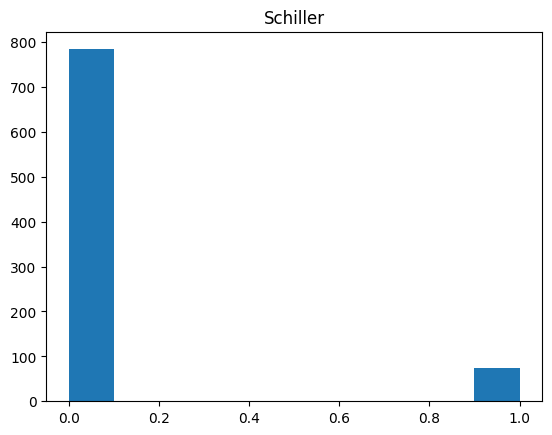

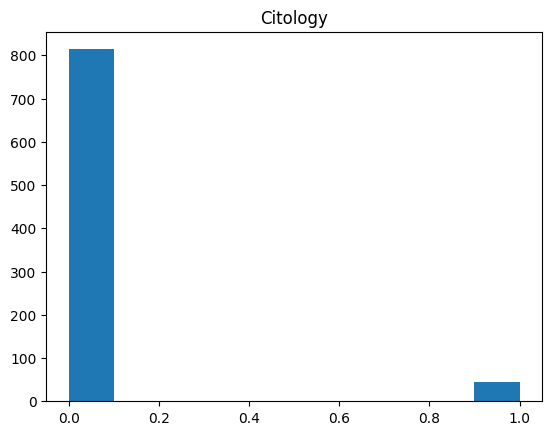

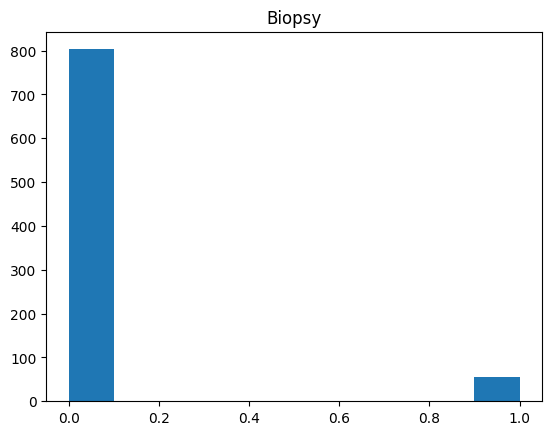

C:\Users\mague\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Export report to file: 100%|██████████| 1/1 [00:00<00:00, 40.54it/s]


In [6]:
import matplotlib.pyplot as plt

for col in X.columns:
  plt.hist(X[col])
  plt.title(col)
  plt.show()

from ydata_profiling import ProfileReport

report = ProfileReport(X)
report.to_file("data_profile.html")

## Script para generar el tipo de dato del dataset
A continuación, un script para obtener un archivo de excel en donde se nos indica el tipo de dato de cada una de las variables del dataset (cualitativa o categorica, cuantitativa continua, cuantitativa discreta)

In [9]:
import pandas as pd
from ucimlrepo import fetch_ucirepo


# Combine features and targets into a single DataFrame for convenience
df = pd.concat([X, y], axis=1)

# Function to determine the type of each variable
def determine_variable_type(df):
    variable_types = {}
    for column in df.columns:
        unique_values = df[column].unique()
        num_unique_values = len(unique_values)
        
        if set(unique_values).issubset({0, 1}) and pd.api.types.is_numeric_dtype(df[column]):
            variable_types[column] = 'Cualitativa (boolean)'
        elif pd.api.types.is_numeric_dtype(df[column]):
            if num_unique_values <= 10:
                variable_types[column] = 'Cuantitativa discreta'
            else:
                variable_types[column] = 'Cuantitativa continua'
        else:
            variable_types[column] = 'Cualitativa o categórica'
    
    return variable_types

# Determine variable types
variable_types = determine_variable_type(df)

# Convert the variable types dictionary to a DataFrame
variable_types_df = pd.DataFrame(list(variable_types.items()), columns=['Variable', 'Tipo'])

# Save the dataset and the variable types to an Excel file
with pd.ExcelWriter('cervical_cancer_data.xlsx') as writer:
    df.to_excel(writer, sheet_name='Datos', index=False)
    variable_types_df.to_excel(writer, sheet_name='Tipos de Variables', index=False)

print("El archivo de Excel ha sido generado y guardado como 'cervical_cancer_data.xlsx'.")


El archivo de Excel ha sido generado y guardado como 'cervical_cancer_data.xlsx'.


### Gráficos exploratorios

Aquí se incluyen los gráficos exploratorios consecuentes en base al tipo de variable.

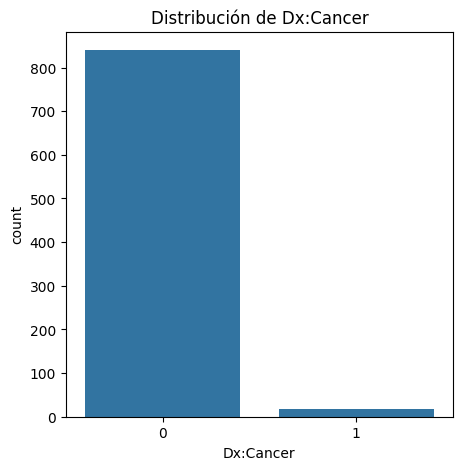

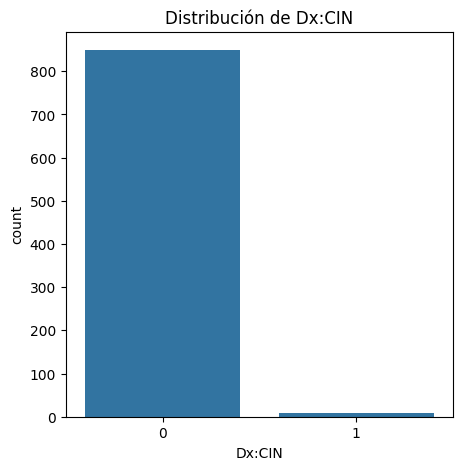

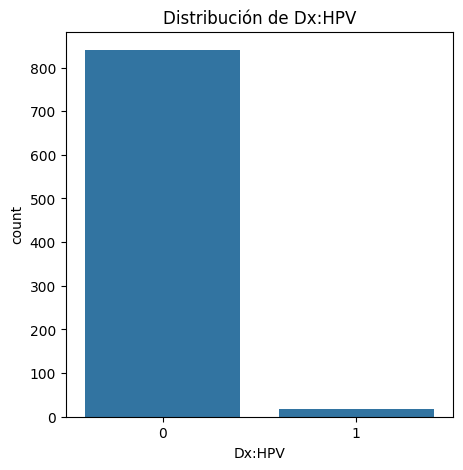

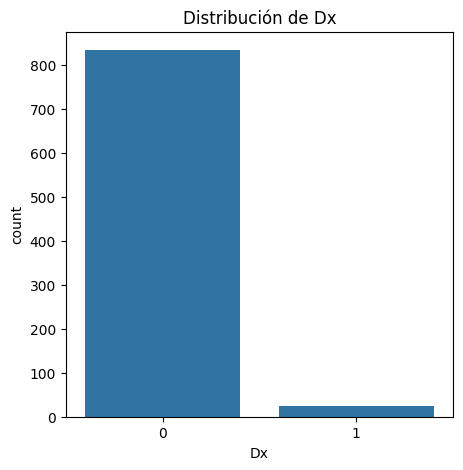

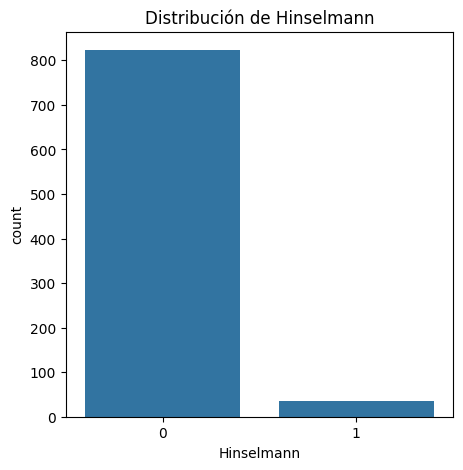

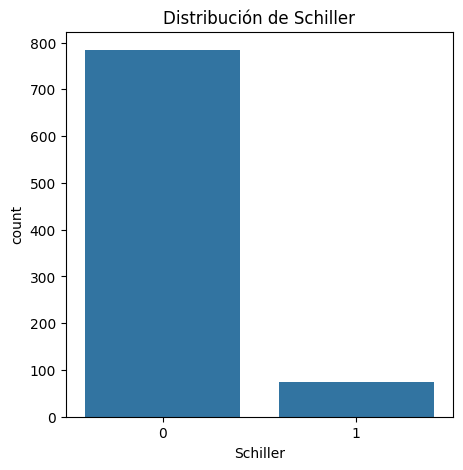

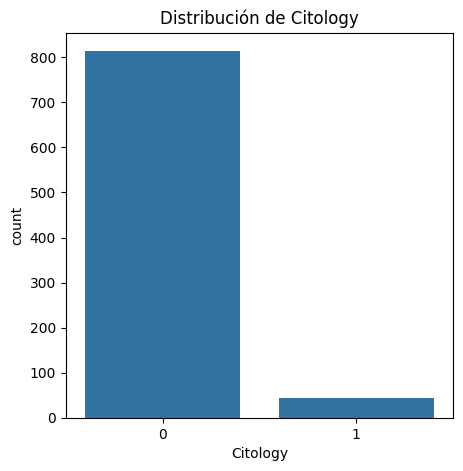

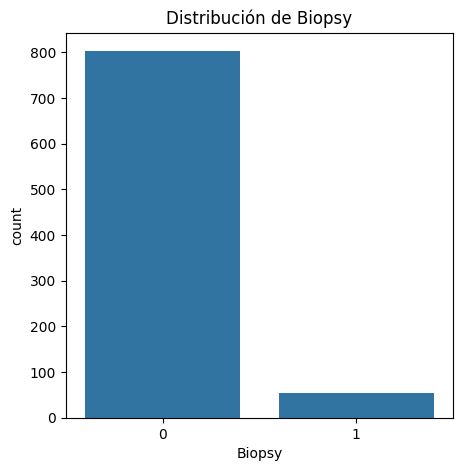

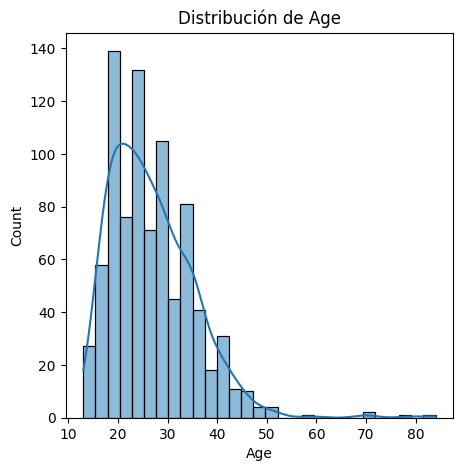

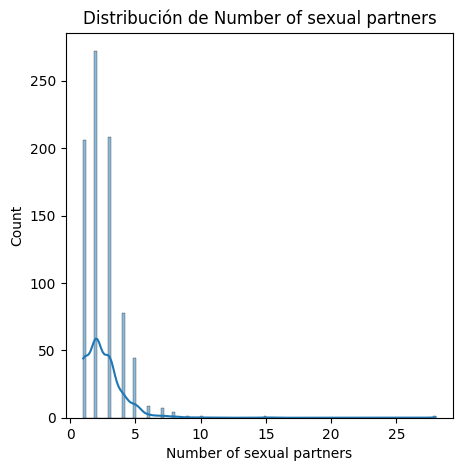

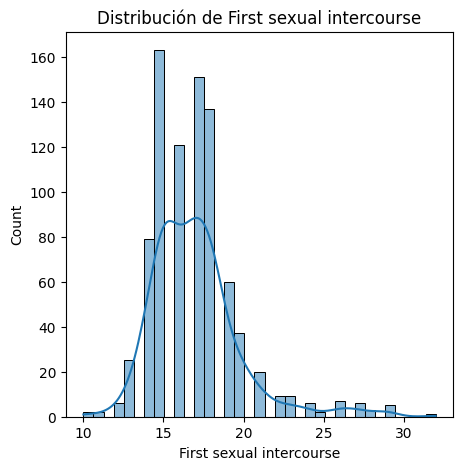

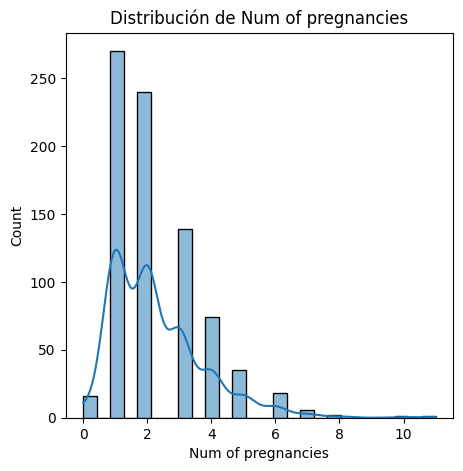

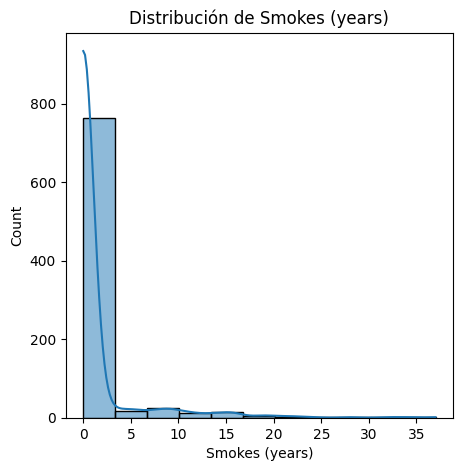

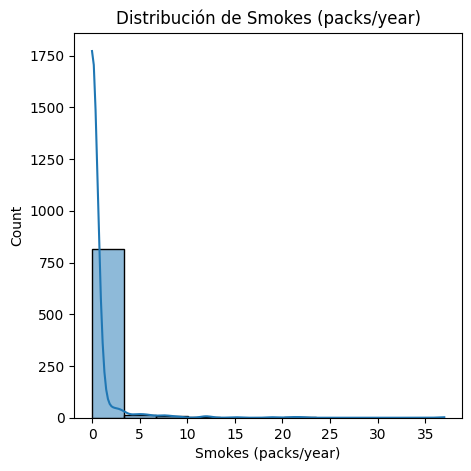

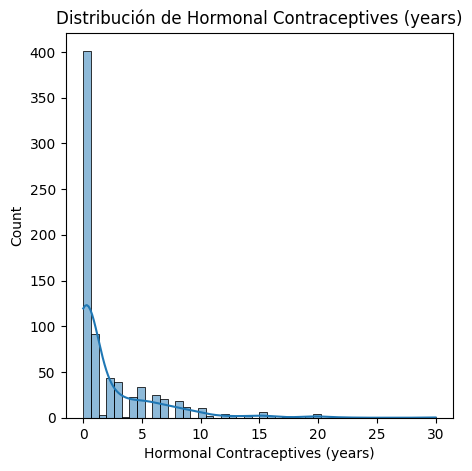

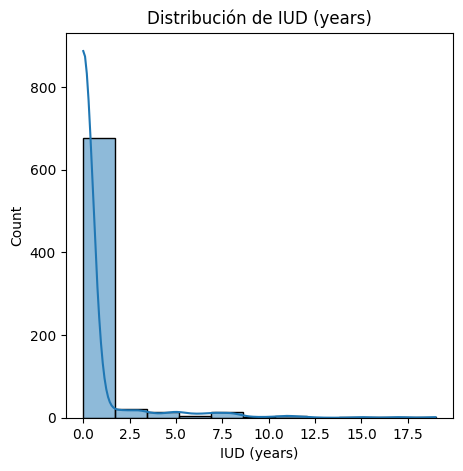

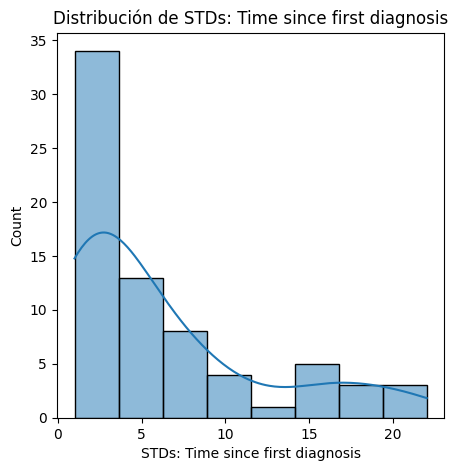

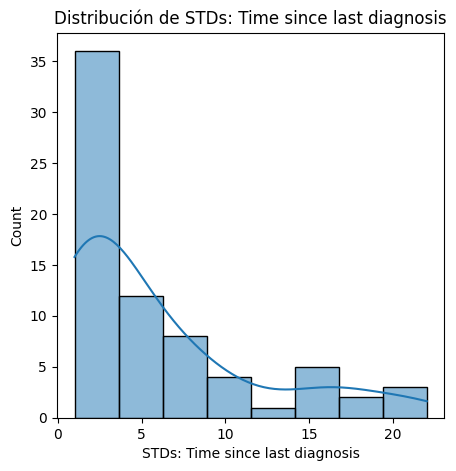

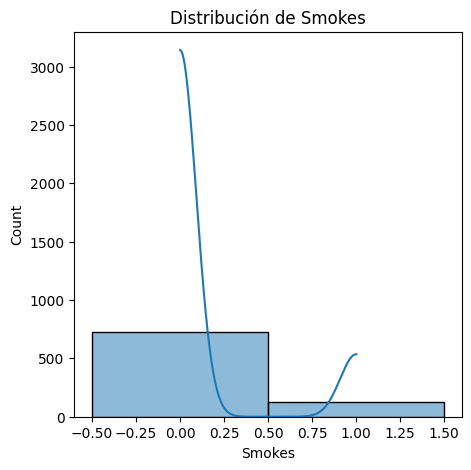

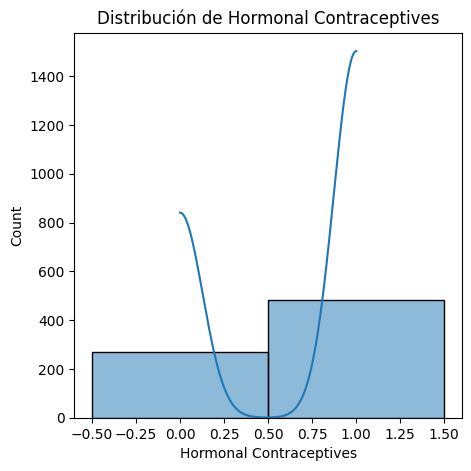

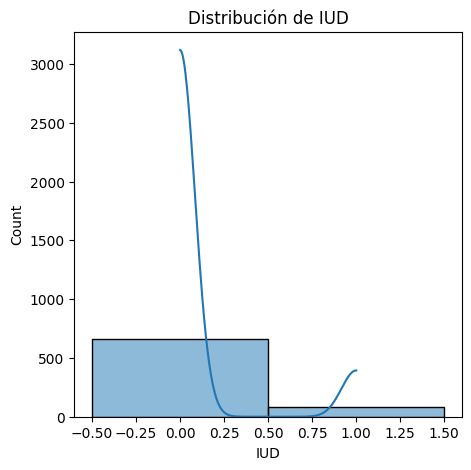

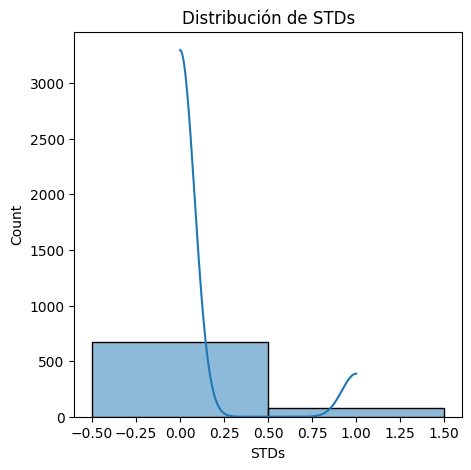

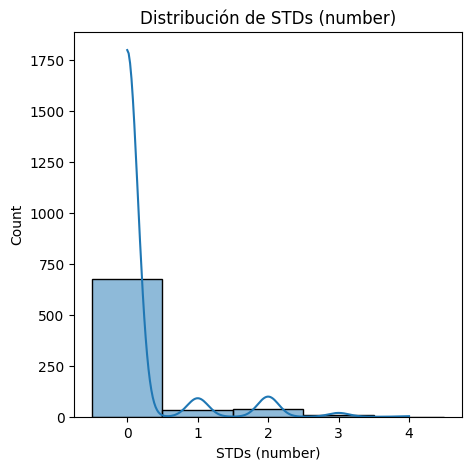

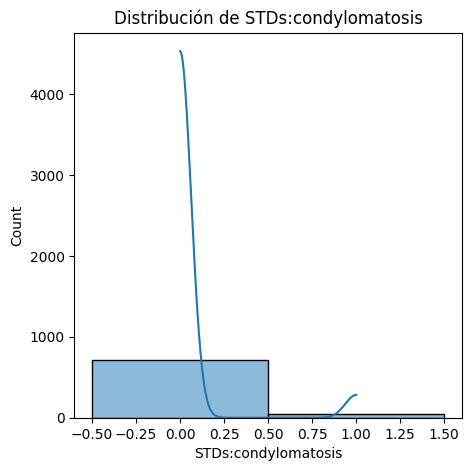

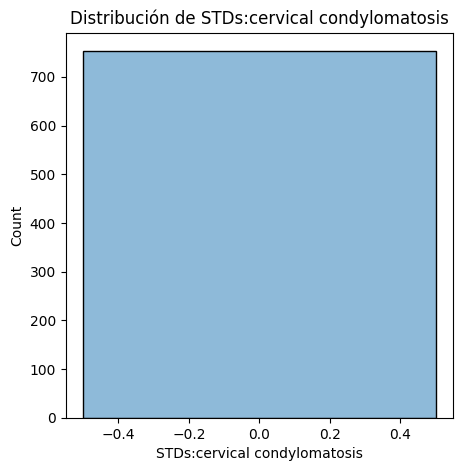

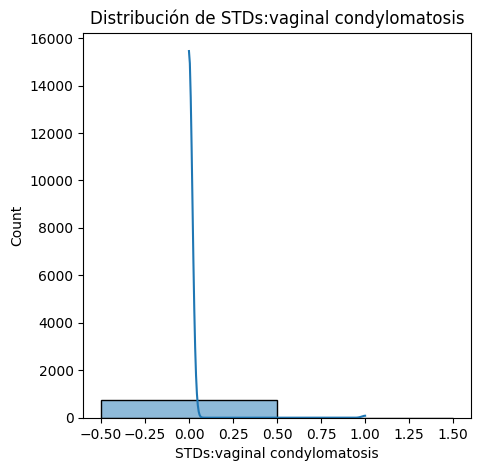

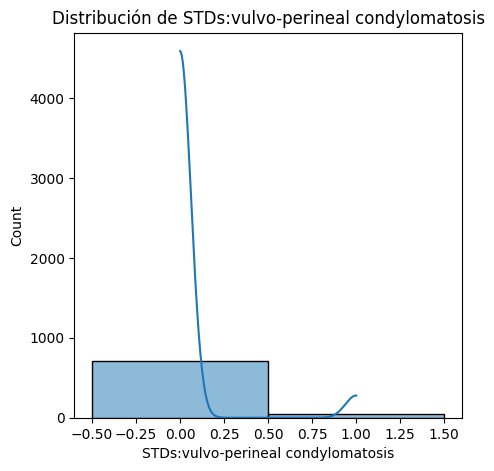

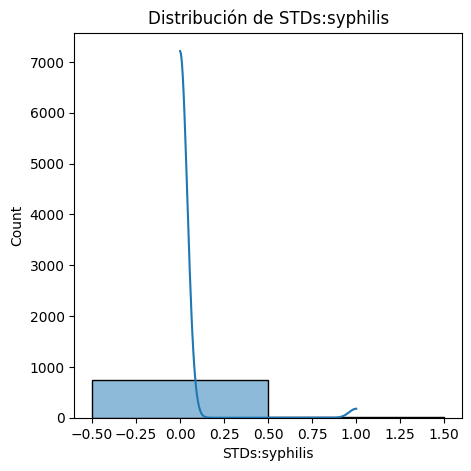

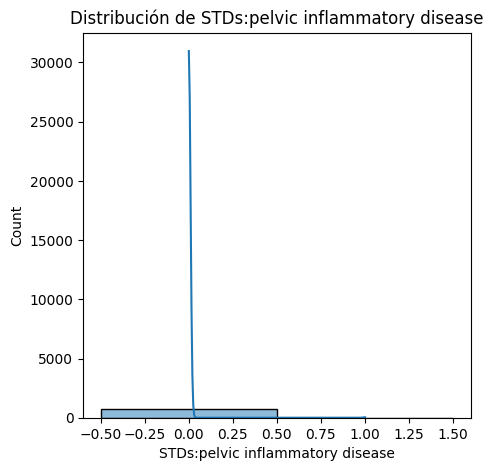

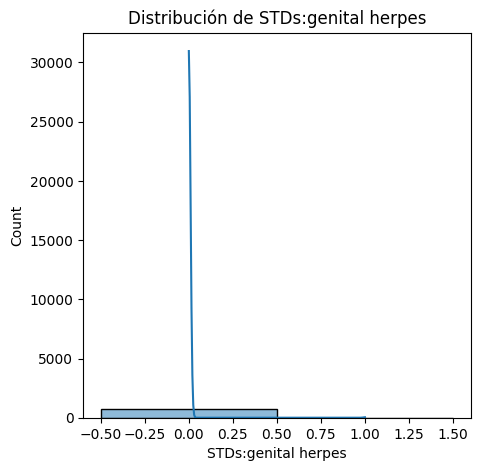

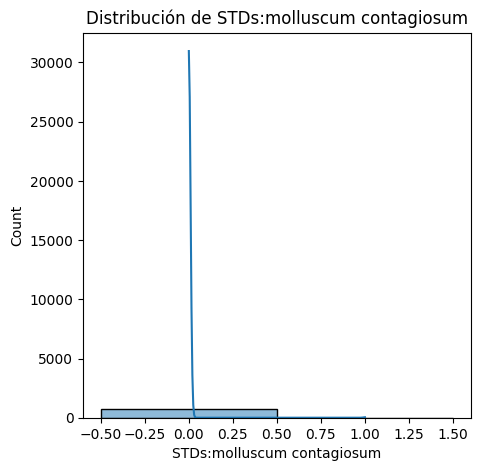

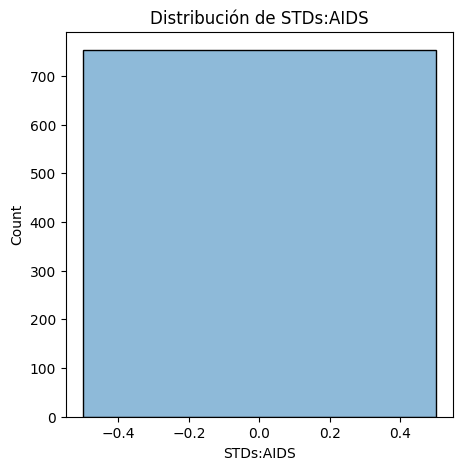

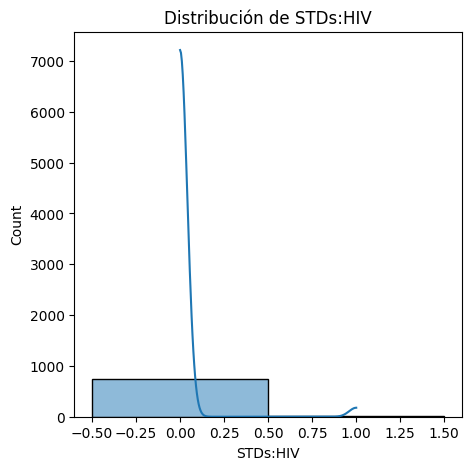

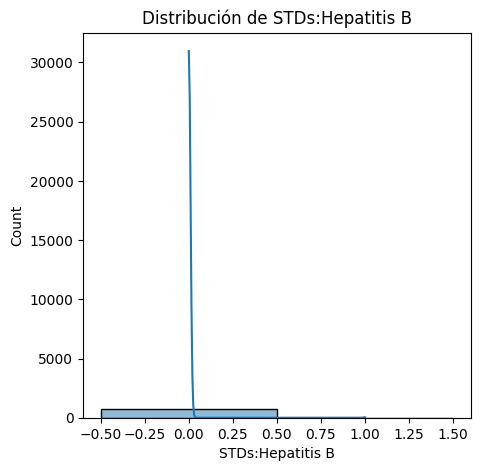

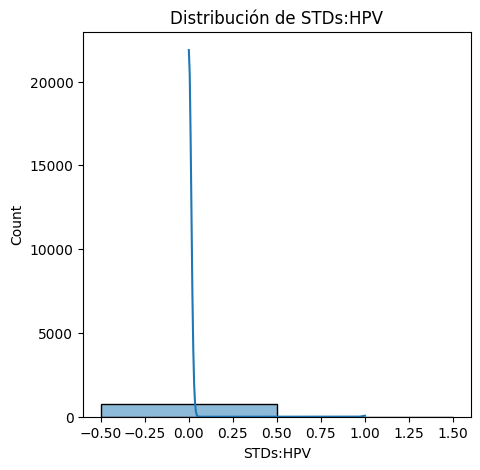

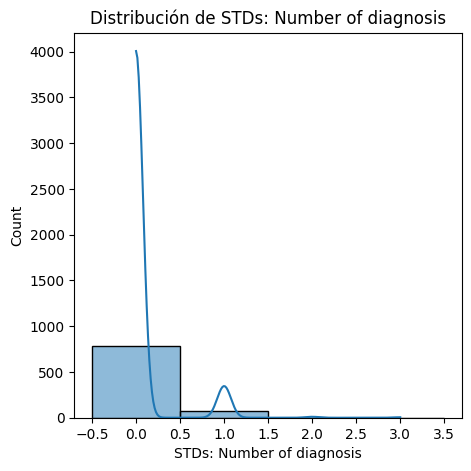

In [12]:
import seaborn as sns

# Separar las variables por tipo
variables_cualitativas = [col for col, tipo in variable_types.items() if 'Cualitativa' in tipo]
variables_cuantitativas_continuas = [col for col, tipo in variable_types.items() if tipo == 'Cuantitativa continua']
variables_cuantitativas_discretas = [col for col, tipo in variable_types.items() if tipo == 'Cuantitativa discreta']

# Gráficos para variables cualitativas
for col in variables_cualitativas:
    plt.figure(figsize=(5, 5))
    sns.countplot(x=X[col])
    plt.title(f'Distribución de {col}')
    plt.show()

# Gráficos para variables cuantitativas continuas
for col in variables_cuantitativas_continuas:
    plt.figure(figsize=(5, 5))
    sns.histplot(X[col].dropna(), kde=True)
    plt.title(f'Distribución de {col}')
    plt.show()

# Gráficos para variables cuantitativas discretas
for col in variables_cuantitativas_discretas:
    plt.figure(figsize=(5, 5))
    sns.histplot(X[col].dropna(), kde=True, discrete=True)
    plt.title(f'Distribución de {col}')
    plt.show()

### Análisis de correlación entre variables cuantitativas.

### Tablas de frecuencia, proporción y gráficos para las variables categóricas.